In [6]:
import requests
from bs4 import BeautifulSoup
import csv

CSV = 'cosmetics.csv'
HOST = 'https://www.wildberries.ru/'
URL = 'https://www.wildberries.ru/catalog/krasota/izrailskaya-kosmetika'
HEADERS = {
    'accept': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36'
}

def receive_html(URL, params = ''):
    rqst = requests.get(URL, headers = HEADERS, params = params)
    return rqst

def receive_content(html):
    soup = BeautifulSoup(html, 'html.parser')
    items = soup.find_all('div', class_ = 'dtList-inner')
    cosmetics = []
    
    for item in items:
        cosmetics.append(
            {
                'brand': item.find('strong', class_ = 'brand-name c-text-sm').get_text(),
                'name': item.find('span', class_ = 'goods-name c-text-sm').get_text(),
                'price': item.find('ins', class_ = 'lower-price').get_text(),
                'former price': item.find('del').get_text(),
                'discount': item.find('span', class_ = 'price-sale active').get_text(),
                'comments': item.find('span', class_ = 'dtList-comments-count c-text-sm').get_text()
            }
        )
    return cosmetics

def save_doc(items, path):
    with open(path, 'w', newline = '') as file:
        writer = csv.writer(file, delimiter = ',')
        writer.writerow(['Бренд', 'Название продукта', 'Цена', 'Старая цена', 'Скидка', 'Комментарии'])
        for item in items:
            writer.writerow([item['brand'], item['name'], item['price'], item['former price'], item['discount'], item['comments']])
        
def parser():
    PAGENATION = 7
    html = receive_html(URL)
    if html.status_code == 200:
        cosmetics = []
        for page in range(1, PAGENATION):
            print(f'Парсим страницу: {page}')
            html = receive_html(URL, params = {'popular&page': page})
            cosmetics.extend(receive_content(html.text))
            save_doc(cosmetics, CSV)
        pass
    else:
        print('Error')

parser()

Парсим страницу: 1
Парсим страницу: 2
Парсим страницу: 3
Парсим страницу: 4
Парсим страницу: 5
Парсим страницу: 6


In [78]:
import pandas as pd
df = pd.read_csv('~/cosmetics.csv')

df

,Бренд,Название продукта,Цена,Старая цена,Скидка,Комментарии
0,Lefami /,Сыворотка / сыворотка для лица / от акне / про...,1 292 ₽,2 340 ₽,-44%,43
1,SeaCare /,Крем,1 110 ₽,5 290 ₽,-79%,981
2,SeaCare /,Крем,900 ₽,4 290 ₽,-79%,757
3,SeaCare /,Крем,797 ₽,4 290 ₽,-81%,1120
4,SeaCare /,Крем,797 ₽,4 290 ₽,-81%,1005
...,...,...,...,...,...,...
601,Aroma Dead Sea /,Крем,1 618 ₽,8 700 ₽,-81%,54
602,SeaCare /,Тоник,574 ₽,3 090 ₽,-81%,32
603,GIGI /,Крем,3 671 ₽,5 560 ₽,-33%,22
604,Dr. Sea /,Соль для ванн,551 ₽,2 370 ₽,-76%,34


In [79]:
df.isnull().sum()

Бренд                0
Название продукта    0
Цена                 0
Старая цена          0
Скидка               0
Комментарии          0
dtype: int64

In [80]:
df.dtypes

Бренд                object
Название продукта    object
Цена                 object
Старая цена          object
Скидка               object
Комментарии           int64
dtype: object

<AxesSubplot:title={'center':'Количество комментариев'}>

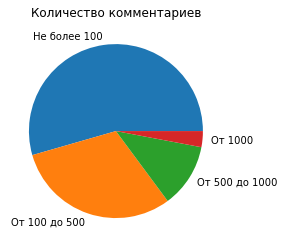

In [81]:
values_comments = []

for comment in df['Комментарии']:
    if comment <= 100:
        values_comments.append(1)
    elif 100 < comment <= 500:
        values_comments.append(2)
    elif 500 < comment < 1000:
        values_comments.append(3)
    elif comment >= 1000:
        values_comments.append(4)

from pandas import DataFrame
df_comments = DataFrame(values_comments)
df_comments.value_counts().plot(kind = 'pie', title = 'Количество комментариев', legend = False, ylabel = '', 
                        labels = ['Не более 100', 'От 100 до 500', 'От 500 до 1000', 'От 1000'])   

<AxesSubplot:title={'center':'Виды продуктов'}>

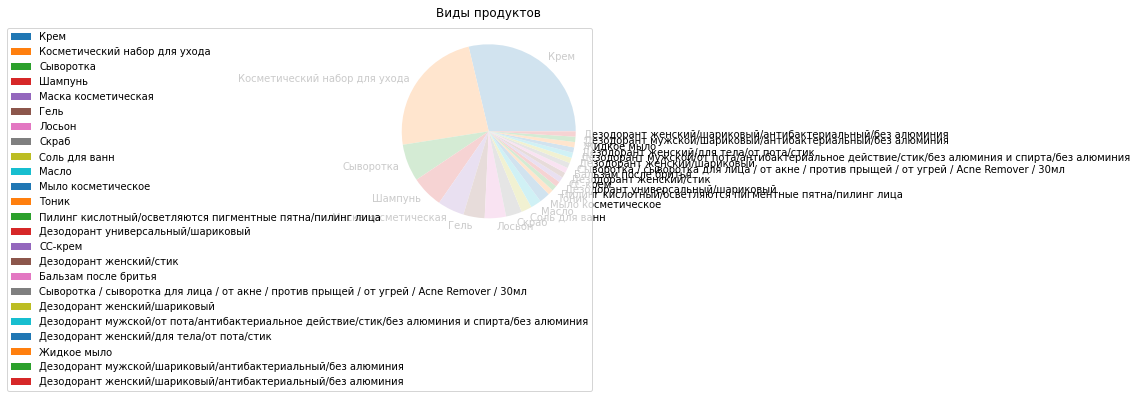

In [82]:
df['Название продукта'].value_counts().plot(kind = 'pie', title = 'Виды продуктов', legend = True, ylabel = '')                                            

<AxesSubplot:title={'center':'Размер скидки'}>

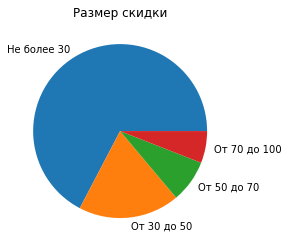

In [83]:
values_discounts = []

for discount in df['Скидка']:
    discount = int(discount.strip('%'))
    if discount >= -30:
        values_discounts.append(1)
    elif -30 > discount >= -50:
        values_discounts.append(2)
    elif -50 > discount >= -70:
        values_discounts.append(3)
    elif discount <= -70:
        values_discounts.append(4)
        
from pandas import DataFrame
df_discounts = DataFrame(values_discounts)
df_discounts.value_counts().plot(kind = 'pie', title = 'Размер скидки', legend = False, ylabel = '', 
                        labels = ['Не более 30', 'От 30 до 50', 'От 50 до 70', 'От 70 до 100'])     

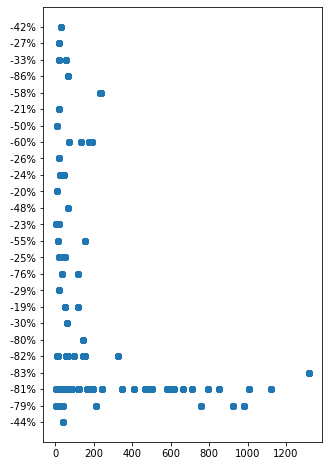

In [84]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(5, 8)) 
ax.scatter(df['Комментарии'], df['Скидка'])

In [85]:
price_list = []
for price in df['Цена']:
    i = (''.join(filter(lambda x: x.isdigit(), price)))
    if i != None:
        price_list.append(int(i))
df['Цена'] = price_list
print(df['Цена'])
print(type(df['Цена'][0]))

0      1292
1      1110
2       900
3       797
4       797
       ... 
601    1618
602     574
603    3671
604     551
605    3478
Name: Цена, Length: 606, dtype: int64
<class 'numpy.int64'>


In [87]:
old_price_list = []
for old_price in df['Старая цена']:
    j = (''.join(filter(lambda x: x.isdigit(), old_price)))
    if j != None:
        old_price_list.append(int(j))
df['Старая цена'] = old_price_list
print(df['Старая цена'])
print(type(df['Старая цена'][0]))

0       2340
1       5290
2       4290
3       4290
4       4290
       ...  
601     8700
602     3090
603     5560
604     2370
605    19990
Name: Старая цена, Length: 606, dtype: int64
<class 'numpy.int64'>


In [89]:
df.dtypes

Бренд                object
Название продукта    object
Цена                  int64
Старая цена           int64
Скидка               object
Комментарии           int64
dtype: object